In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('./accepted_2007_to_2018Q4.csv')
data.head(5)


C:\Users\user\AppData\Local\Temp\ipykernel_19696\62786924.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [3]:
columns_to_keep = ['loan_amnt','int_rate','installment','emp_title','emp_length','home_ownership','annual_inc','issue_d','loan_status','purpose','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','zip_code','addr_state', 'grade' , 'collections_12_mths_ex_med']

# 컬럼 제외하고 나머지 삭제
data.drop(columns=[col for col in data.columns if col not in columns_to_keep], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   int_rate                    float64
 2   installment                 float64
 3   grade                       object 
 4   emp_title                   object 
 5   emp_length                  object 
 6   home_ownership              object 
 7   annual_inc                  float64
 8   issue_d                     object 
 9   loan_status                 object 
 10  purpose                     object 
 11  zip_code                    object 
 12  addr_state                  object 
 13  dti                         float64
 14  earliest_cr_line            object 
 15  open_acc                    float64
 16  pub_rec                     float64
 17  revol_bal                   float64
 18  revol_util                  float64
 19  total_acc            

In [5]:
pd.options.display.float_format = '{:.5f}'.format

In [6]:
target = data['loan_status']

In [7]:
import plotly.express as px


data.describe().T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn')
    

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2260668.000000,15046.931228,9190.245488,500.000000,8000.000000,12900.000000,20000.000000,40000.000000
int_rate,2260668.000000,13.092829,4.832138,5.310000,9.490000,12.620000,15.990000,30.990000
installment,2260668.000000,445.806823,267.173535,4.930000,251.650000,377.990000,593.320000,1719.830000
annual_inc,2260664.000000,77992.428687,112696.199574,0.000000,46000.000000,65000.000000,93000.000000,110000000.000000
dti,2258957.000000,18.824196,14.183329,-1.000000,11.890000,17.840000,24.490000,999.000000
open_acc,2260639.000000,11.612402,5.640861,0.000000,8.000000,11.000000,14.000000,101.000000
pub_rec,2260639.000000,0.197528,0.570515,0.000000,0.000000,0.000000,0.000000,86.000000
revol_bal,2260668.000000,16658.458078,22948.305028,0.000000,5950.000000,11324.000000,20246.000000,2904836.000000
revol_util,2258866.000000,50.337696,24.713073,0.000000,31.500000,50.300000,69.400000,892.300000
total_acc,2260639.000000,24.162552,11.987528,1.000000,15.000000,22.000000,31.000000,176.000000


In [8]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['결측치 개수'] = df.isna().sum()
    sum['결측치 비율'] = (df.isna().sum())/len(df)
    sum['고유값 개수'] = df.nunique().values
    sum['데이터 개수'] = df.count().values


    return sum

summary(data).style.background_gradient(cmap='Blues')

,dtypes,결측치 개수,결측치 비율,고유값 개수,데이터 개수
loan_amnt,float64,33,0.000015,1572,2260668
int_rate,float64,33,0.000015,673,2260668
installment,float64,33,0.000015,93301,2260668
grade,object,33,0.000015,7,2260668
emp_title,object,167002,0.073872,512694,2093699
emp_length,object,146940,0.064998,11,2113761
home_ownership,object,33,0.000015,6,2260668
annual_inc,float64,37,0.000016,89368,2260664
issue_d,object,33,0.000015,139,2260668
loan_status,object,33,0.000015,9,2260668


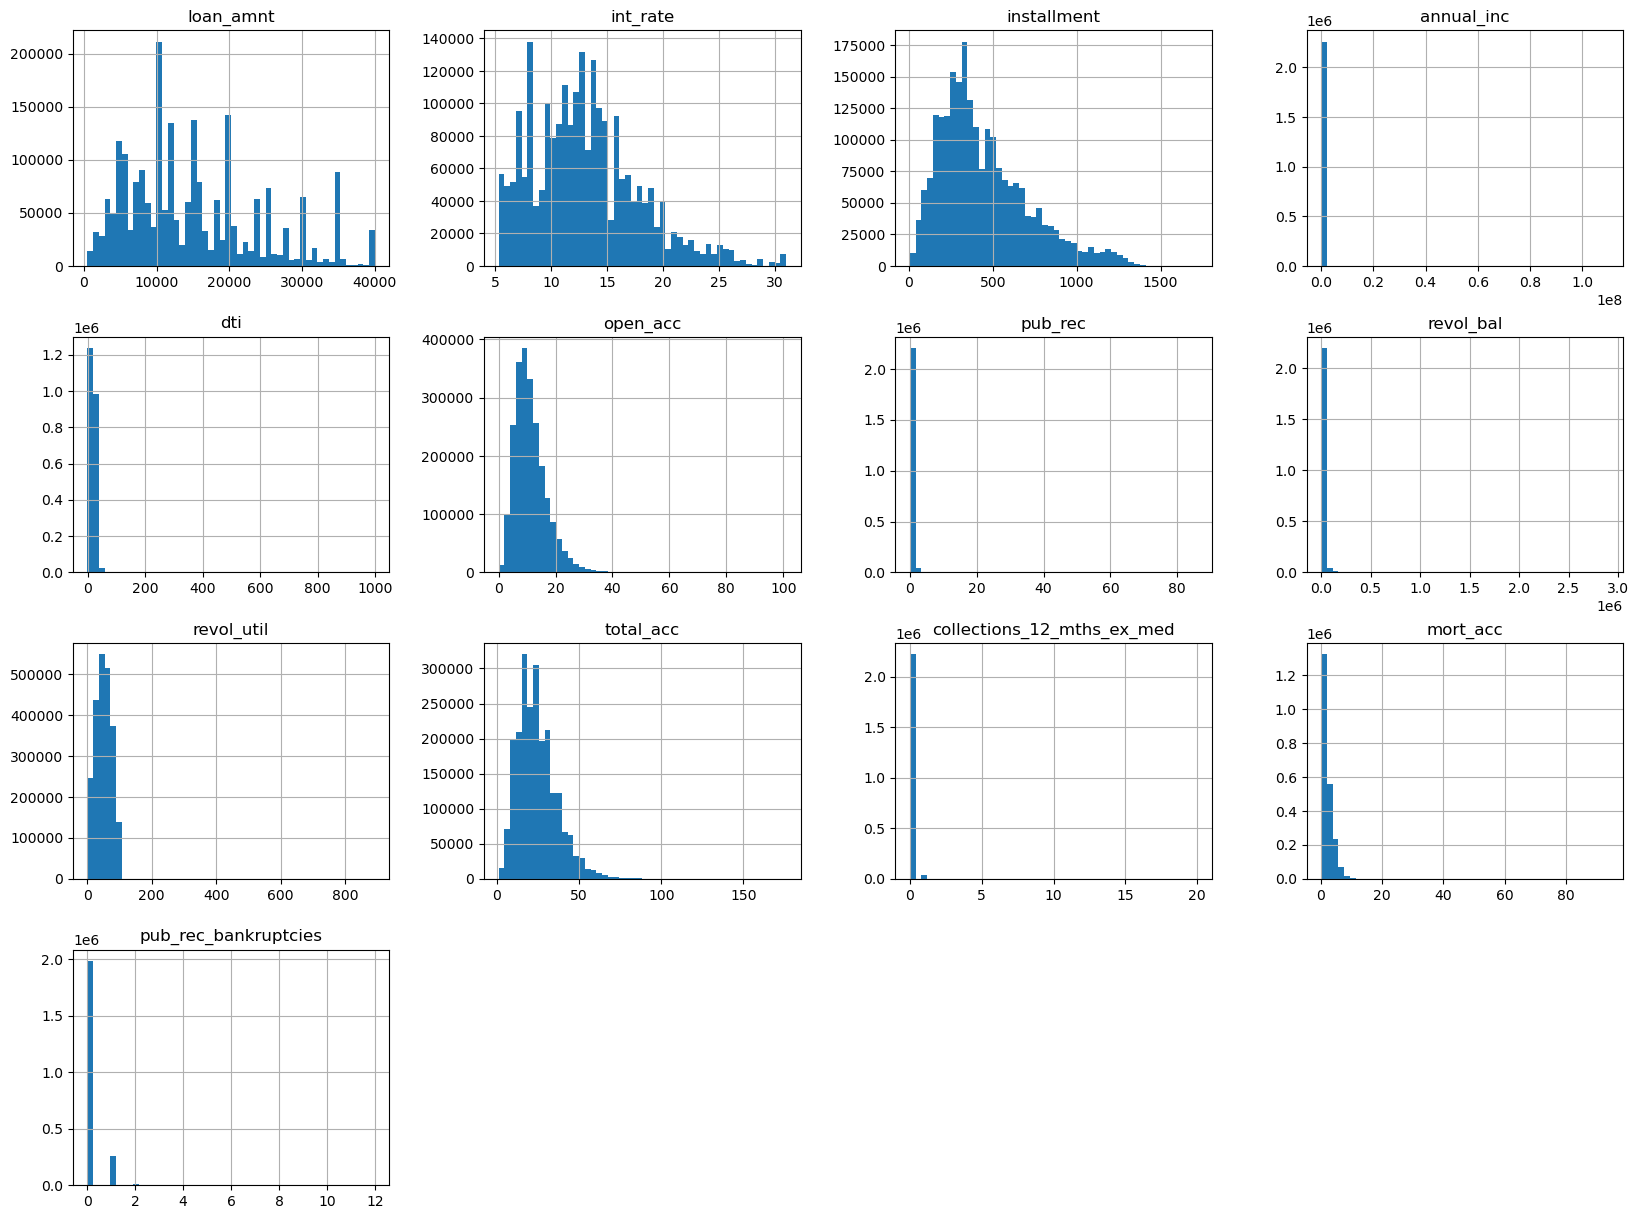

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(
    bins=50,
    figsize=(20, 15),
)

plt.show()

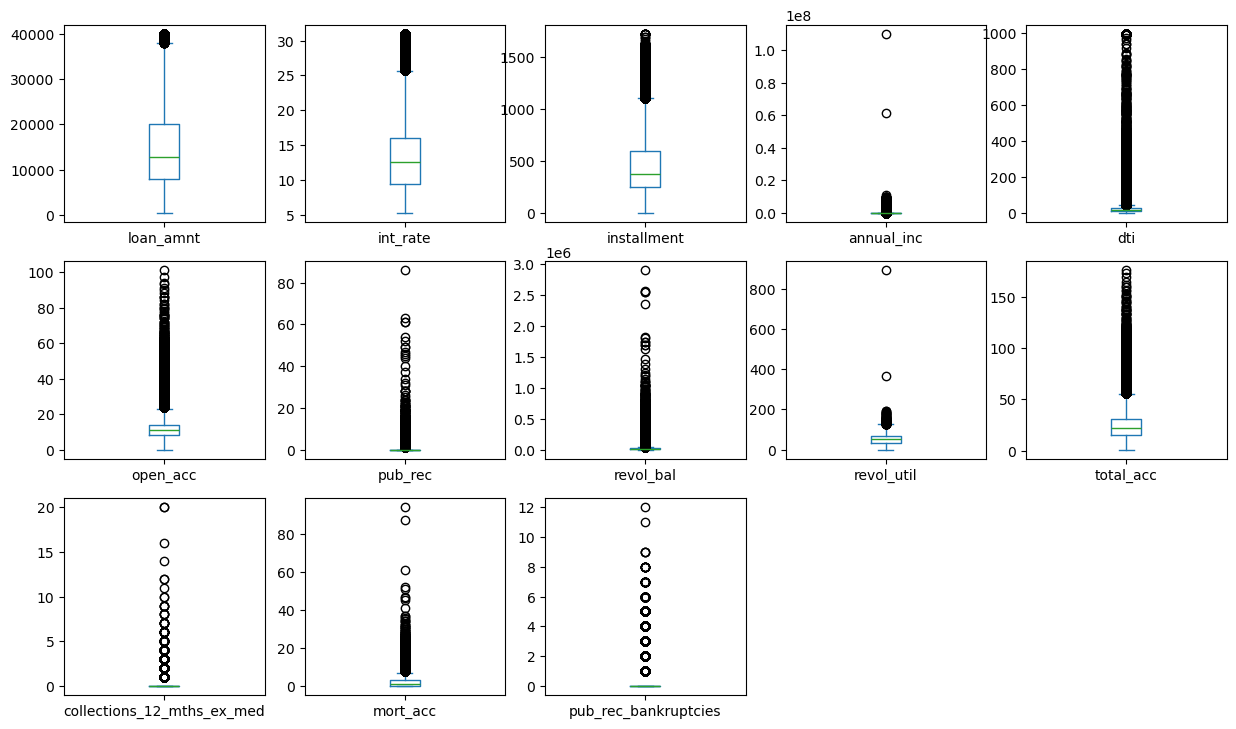

In [10]:
data.plot(kind='box', subplots=True, layout=(7, 5), figsize=(15, 21))
plt.show()

## feature 정리


명목형 : home_ownership , loan_status , purpose , zip_code , earliest_cr_line , issue_d

순서형 : emp_length

이진 분류로 변경 (해도 될까 ? ): annual_inc,  pub_rec , revol_bal  


------

EDA 이후 삭제한 피처들

addr_state , pub_rec_bankruptcies

------

참고 : earliest_cr_line , issue_d 의 경우 , 추후 현재 날짜 - 기존 날짜로 총합 계산



<계획>
날짜 피처 : earliest_cr_line , issue_d  -> ohe
명목형 : ohe
순서형 : ord

In [11]:
data['earliest_cr_line'].fillna(0)

0          Aug-2003
1          Dec-1999
2          Aug-2000
3          Sep-2008
4          Jun-1998
             ...   
2260696    Feb-1995
2260697    Jul-1999
2260698    Jun-1996
2260699           0
2260700           0
Name: earliest_cr_line, Length: 2260701, dtype: object

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
emp_title_other = data['emp_title']
emp_title_other = emp_title_other.to_frame()
emp_title_other_ = emp_title_other.applymap(lambda x: 1 if pd.notnull(x) else x)
emp_title_other_.fillna(0 , inplace= True)
data['emp'] = emp_title_other_

In [14]:
data = data.drop('emp_title',  axis = 1)

Text(0.5, 1.0, 'loan_status')

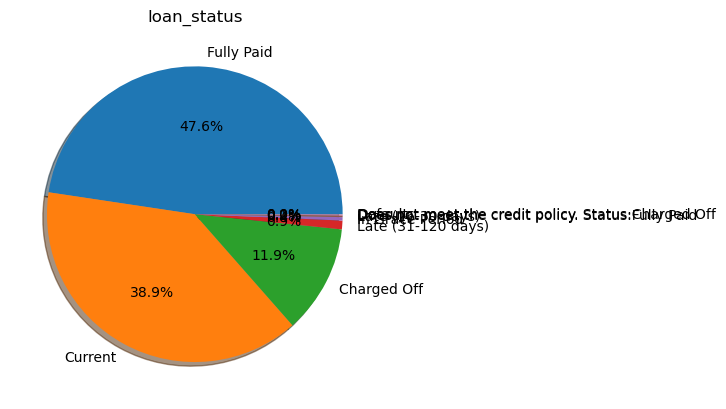

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(data['loan_status'].value_counts(), labels=data['loan_status'].value_counts().index, autopct='%.1f%%', shadow = True)
plt.title('loan_status')



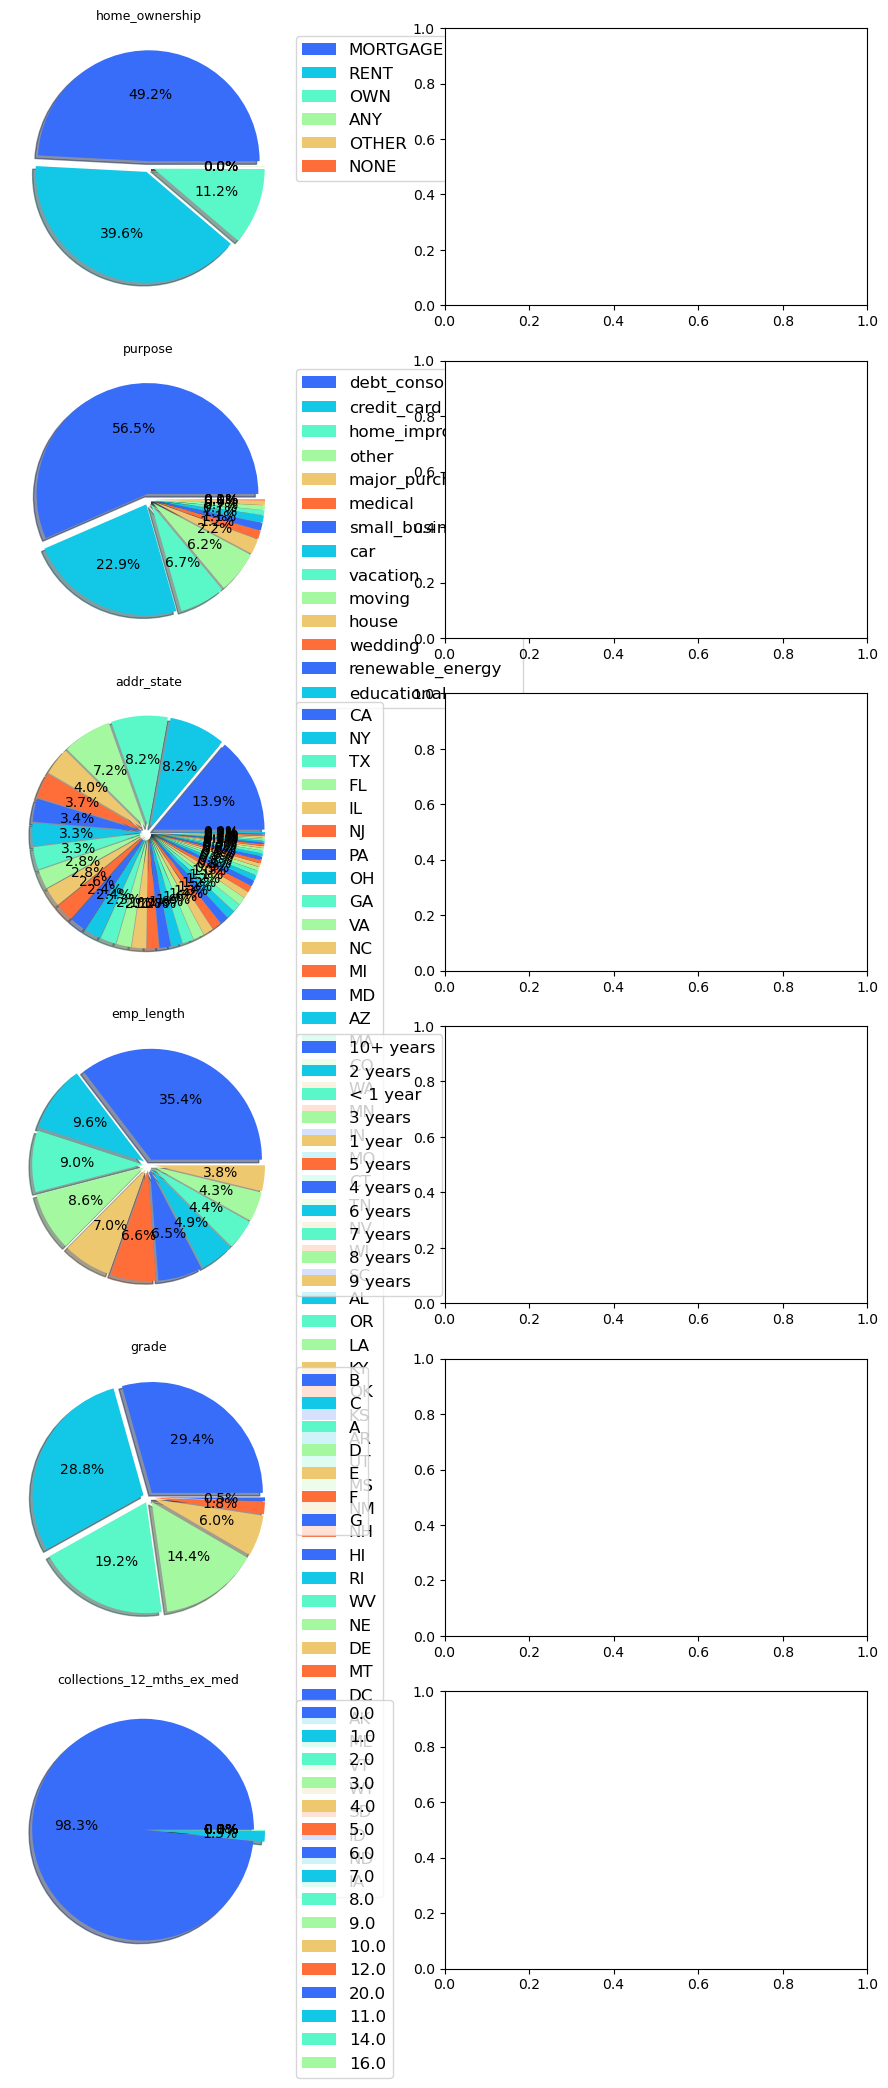

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('rainbow')

num = ['home_ownership'  , 'purpose' , 'addr_state' , 'emp_length' , 'grade' , 'collections_12_mths_ex_med']

fig, axes = plt.subplots(len(num), 2 ,figsize = (12, len(num) * 4.2))

df = pd.concat([data[num].assign(Source = 'data')],
               axis=0, ignore_index = True)

for i,col in enumerate(num):
    data_dist = df.loc[df.Source =='data', [col]].value_counts()
  
    ax = axes[i,0]
    ax.pie(data_dist, shadow=True, explode=[.05]*len(data_dist), autopct='%.1f%%')
    ax.legend([category[0] for category in data_dist.index], loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title(f'{col}',fontsize = 9)

  
#plt.suptitle(f"\nDistribution analysis - categorical features\n",fontsize = 15, y = 0.9, x = 0.57)
plt.show()

In [17]:
import numpy as np

corr = data.corr(numeric_only=True)

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) 
corr.style.background_gradient(cmap='Blues')


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\pandas\io\formats\style.py:3926: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\pandas\io\formats\style.py:3927: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,pub_rec_bankruptcies,emp
loan_amnt,nan,0.098082,0.945625,0.197246,0.043542,0.182229,-0.058772,0.316715,0.099078,0.199570,-0.021849,0.219051,-0.083562,0.073250
int_rate,nan,nan,0.123949,-0.050583,0.124491,-0.010472,0.053381,-0.028880,0.262670,-0.040951,0.018299,-0.090105,0.056653,-0.004643
installment,nan,nan,nan,0.190270,0.044841,0.171445,-0.047035,0.302816,0.120951,0.178342,-0.017488,0.184379,-0.075078,0.063839
annual_inc,nan,nan,nan,nan,-0.082619,0.094377,-0.002543,0.190760,0.028207,0.115271,-0.003484,0.134760,-0.027132,0.058247
dti,nan,nan,nan,nan,nan,0.186124,-0.026029,0.102147,0.115225,0.147335,-0.007025,-0.009555,-0.012379,-0.060112
open_acc,nan,nan,nan,nan,nan,nan,-0.014849,0.237097,-0.134632,0.717911,0.007967,0.134421,-0.016412,0.067464
pub_rec,nan,nan,nan,nan,nan,nan,nan,-0.085610,-0.051795,0.003846,0.009894,-0.011473,0.659237,-0.030946
revol_bal,nan,nan,nan,nan,nan,nan,nan,nan,0.245087,0.204726,-0.024741,0.213466,-0.108887,0.034006
revol_util,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.093147,-0.034897,0.038338,-0.073866,0.048064
total_acc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.005667,0.367873,0.022968,0.045374


In [18]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

def plot_target_ratio_by_features(data, features, size = (12,18)):

  plt.rc('font' , size = 9)
  plt.figure(figsize = size) # 전체 Figure 크기 설정

  # 특성 개수를 기반으로 필요한 행 수 계산
  num_rows = (len(features) + 1) // 2  # 특성 개수가 홀수인 경우 처리하기 위해 +1

  # 모든 특성을 수용하도록 GridSpec 업데이트
  grid = gridspec.GridSpec(num_rows, 2) # 서브 플롯 배치

  plt.subplots_adjust(wspace = 0.4, hspace = 0.3) # 서브플롯 간 좌우/상하 여백 설정

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])

    # ax축에 고윳값별 타깃값 1의 비율을 막대그래프로 그리기
    sns.barplot(x = data[feature],
                y= data['loan_status'],
                data = data,
                palette = 'Set2',
                ax=ax
                )
    ax.invert_yaxis()

C:\Users\user\AppData\Local\Temp\ipykernel_19696\4203806778.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[feature],
C:\Users\user\AppData\Local\Temp\ipykernel_19696\4203806778.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[feature],
C:\Users\user\AppData\Local\Temp\ipykernel_19696\4203806778.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data[feature],
C:\Users\user\AppData\Local\Temp\ipykernel_19696\4203806778.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

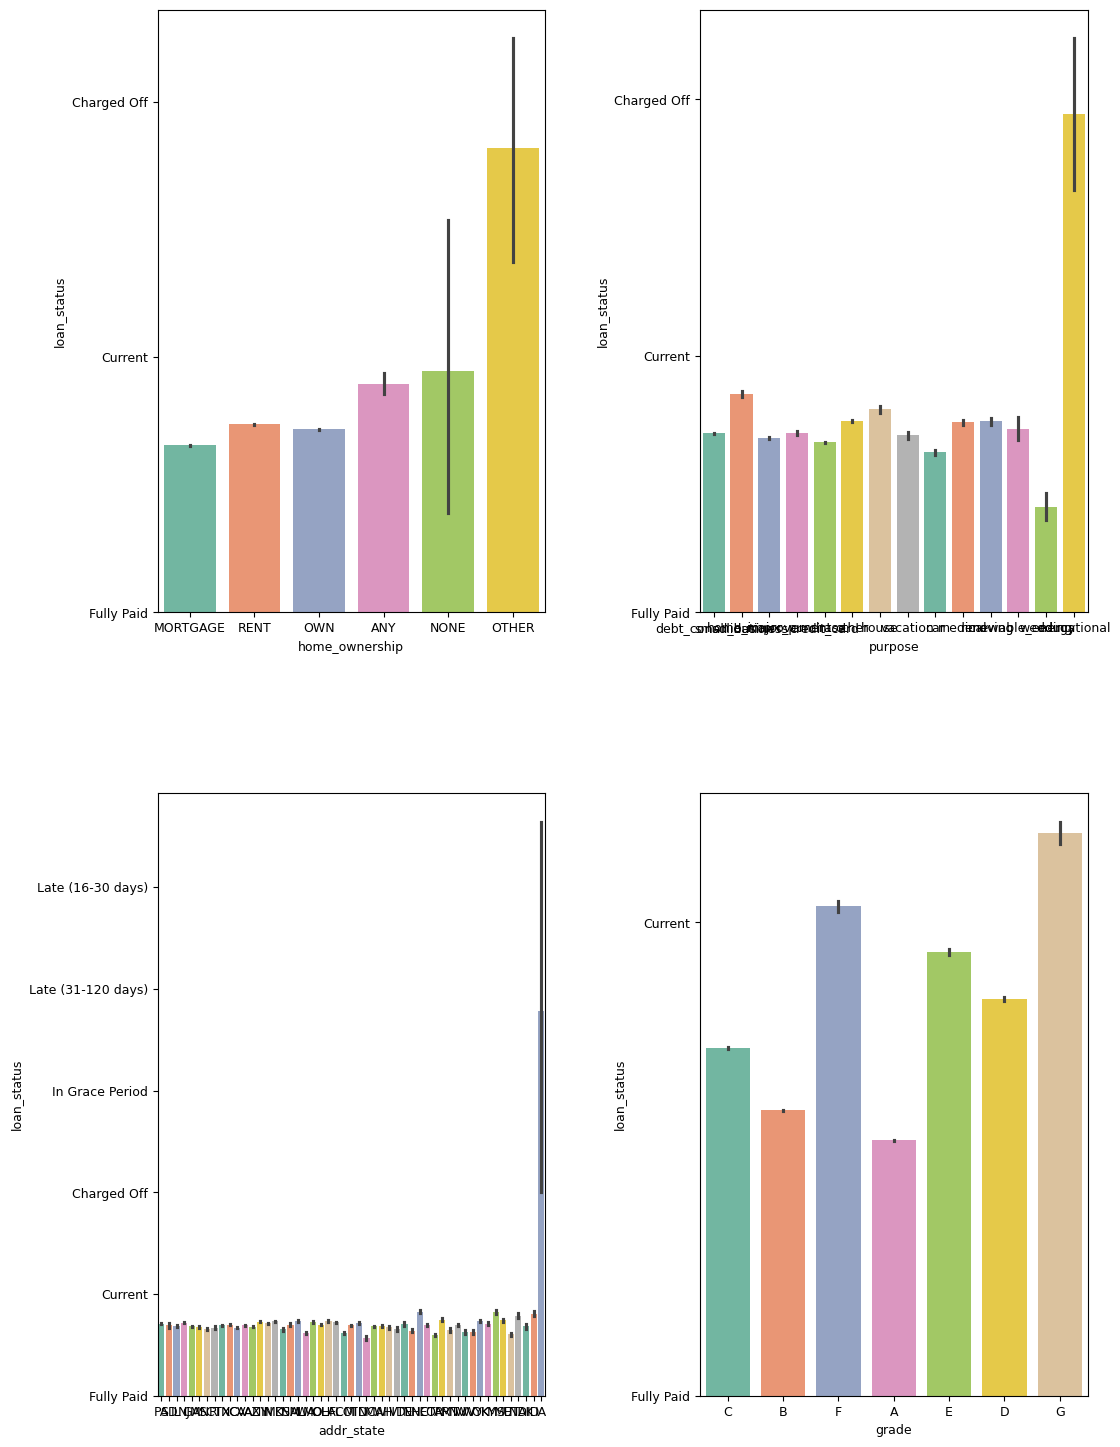

In [19]:
nom_features = ['home_ownership' , 'purpose' , 'addr_state','grade']
plot_target_ratio_by_features(data , nom_features , size = (12,18))

In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 평균 계산
mean = data.mean()

# 분산 계산
variance = data.var()

# 편향(표준 편차) 계산
bias = data.std()

# 결과 출력
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Bias (Standard Deviation): {bias}")


C:\Users\user\AppData\Local\Temp\ipykernel_19696\203985751.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
C:\Users\user\AppData\Local\Temp\ipykernel_19696\203985751.py:9: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = data.var()


Mean: loan_amnt                    15046.93123
int_rate                        13.09283
installment                    445.80682
annual_inc                   77992.42869
dti                             18.82420
open_acc                        11.61240
pub_rec                          0.19753
revol_bal                    16658.45808
revol_util                      50.33770
total_acc                       24.16255
collections_12_mths_ex_med       0.01815
mort_acc                         1.55538
pub_rec_bankruptcies             0.12819
emp                              0.92614
dtype: float64
Variance: loan_amnt                       84460612.13370
int_rate                              23.34956
installment                        71381.69760
annual_inc                   12700433398.53254
dti                                  201.16681
open_acc                              31.81932
pub_rec                                0.32549
revol_bal                      526624703.64845
revol_util         

C:\Users\user\AppData\Local\Temp\ipykernel_19696\203985751.py:12: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bias = data.std()


In [22]:
import math

# Given data
data = {
    "loan_amnt": {"mean": 15046.93123, "variance": 84460612.13370, "bias": 9190.24549},
    "int_rate": {"mean": 13.09283, "variance": 23.34956, "bias": 4.83214},
    "installment": {"mean": 445.80682, "variance": 71381.69760, "bias": 267.17353},
    "annual_inc": {"mean": 77992.42869, "variance": 12700433398.53254, "bias": 112696.19957},
    "dti": {"mean": 18.82420, "variance": 201.16681, "bias": 14.18333},
    "open_acc": {"mean": 11.61240, "variance": 31.81932, "bias": 5.64086},
    "pub_rec": {"mean": 0.19753, "variance": 0.32549, "bias": 0.57052},
    "revol_bal": {"mean": 16658.45808, "variance": 526624703.64845, "bias": 22948.30503},
    "revol_util": {"mean": 50.33770, "variance": 610.73599, "bias": 24.71307},
    "total_acc": {"mean": 24.16255, "variance": 143.70084, "bias": 11.98753},
    "collections_12_mths_ex_med": {"mean": 0.01815, "variance": 0.02274, "bias": 0.15081},
    "mort_acc": {"mean": 1.55538, "variance": 3.62895, "bias": 1.90498},
    "pub_rec_bankruptcies": {"mean": 0.12819, "variance": 0.13294, "bias": 0.36461},
    "emp": {"mean": 0.92614, "variance": 0.06840, "bias": 0.26154}
}

# Function to analyze the data
def analyze_data(data):
    analysis = {}
    
    for key in data:
        mean = data[key]["mean"]
        variance = data[key]["variance"]
        bias = data[key]["bias"]
        
        # Calculate standard deviation from variance
        std_dev = math.sqrt(variance)
        
        # Calculate coefficient of variation (CV)
        cv = (std_dev / mean) * 100
        
        analysis[key] = {
            "mean": mean,
            "variance": variance,
            "standard_deviation (calculated)": std_dev,
            "bias (given)": bias,
            "difference between calculated std_dev and given bias (if any)": abs(std_dev - bias),
            "coefficient_of_variation (%)": cv
        }
    
    return analysis

# Analyze the data
analysis_result = analyze_data(data)

# Print the analysis result
for key in analysis_result:
    print(f"{key}:")
    for metric in analysis_result[key]:
        print(f"   {metric}: {analysis_result[key][metric]}")



loan_amnt:
   mean: 15046.93123
   variance: 84460612.1337
   standard_deviation (calculated): 9190.245488217384
   bias (given): 9190.24549
   difference between calculated std_dev and given bias (if any): 1.78261507244315e-06
   coefficient_of_variation (%): 61.07720802162119
int_rate:
   mean: 13.09283
   variance: 23.34956
   standard_deviation (calculated): 4.832138243055552
   bias (given): 4.83214
   difference between calculated std_dev and given bias (if any): 1.7569444477061325e-06
   coefficient_of_variation (%): 36.90675158125136
installment:
   mean: 445.80682
   variance: 71381.6976
   standard_deviation (calculated): 267.17353461748417
   bias (given): 267.17353
   difference between calculated std_dev and given bias (if any): 4.617484137270367e-06
   coefficient_of_variation (%): 59.93033812660923
annual_inc:
   mean: 77992.42869
   variance: 12700433398.53254
   standard_deviation (calculated): 112696.19957448672
   bias (given): 112696.19957
   difference between calc



1. **loan_amnt (대출 금액)**:
   - 평균: 15046.93
   - 분산: 84460612.13
   - 표준 편차(계산된 값): 9190.25
   - 변동 계수 (CV): 61.08%

2. **int_rate (이자율)**:
   - 평균: 13.09
   - 분산: 23.35
   - 표준 편차(계산된 값): 4.83
   - 변동 계수 (CV): 36.91%

3. **installment (할부금)**:
   - 평균: 445.81
   - 분산: 71381.70
   - 표준 편차(계산된 값): 267.17
   - 변동 계수 (CV): 59.93%

4. **annual_inc (연간 소득)**:
   - 평균: 77992.43
   - 분산: 12700433398.53
   - 표준 편차(계산된 값): 112696.20
   - 변동 계수 (CV): 144.50%

5. **dti (부채 대비 소득 비율)**:
   - 평균: 18.82
   - 분산: 201.17
   - 표준 편차(계산된 값): 14.18
   - 변동 계수 (CV): 75.34%

6. **open_acc (개설된 계좌 수)**:
   - 평균: 11.61
   - 분산: 31.82
   - 표준 편차(계산된 값): 5.64
   - 변동 계수 (CV): 48.58%

7. **pub_rec (공개 기록)**:
   - 평균: 0.20
   - 분산: 0.33
   - 표준 편차(계산된 값): 0.57
   - 변동 계수 (CV): 288.77%

8. **revol_bal (회전 잔액)**:
   - 평균: 16658.46
   - 분산: 526624703.65
   - 표준 편차(계산된 값): 22948.31
   - 변동 계수 (CV): 137.76%

9. **revol_util (회전 이용률)**:
   - 평균: 50.34
   - 분산: 610.74
   - 표준 편차(계산된 값): 24.71
   - 변동 계수 (CV): 49.09%

10. **total_acc (총 계좌 수)**:
    - 평균: 24.16
    - 분산: 143.70
    - 표준 편차(계산된 값): 11.99
    - 변동 계수 (CV): 49.63%

11. **collections_12_mths_ex_med (지난 12개월 동안의 수금)**:
    - 평균: 0.02
    - 분산: 0.02
    - 표준 편차(계산된 값): 0.15
    - 변동 계수 (CV): 830.94%

12. **mort_acc (모기지 계좌 수)**:
    - 평균: 1.56
    - 분산: 3.63
    - 표준 편차(계산된 값): 1.90
    - 변동 계수 (CV): 122.48%

13. **pub_rec_bankruptcies (공개 기록 파산)**:
    - 평균: 0.13
    - 분산: 0.13
    - 표준 편차(계산된 값): 0.36
    - 변동 계수 (CV): 284.43%

14. **emp (고용 상태)**:
    - 평균: 0.93
    - 분산: 0.07
    - 표준 편차(계산된 값): 0.26
    - 변동 계수 (CV): 28.24%

이 분석을 통해 `annual_inc` (연간 소득)의 변동 계수(CV)가 144.50%로, 다른 변수들에 비해 상당히 높은 변동성을 보인다는 것을 알 수 있습니다. 이는 연간 소득 데이터가 평균에 비해 매우 큰 변동성을 가지고 있음을 나타냅니다. 반면, `emp` (고용 상태)의 변동 계수는 28.24%로, 상대적으로 낮은 변동성을 보입니다.

